In [1]:
# DataFrames
using DataFrames
using PyCall
using Pandas
using JDF
# np = pyimport("numpy")
pd = Pandas   # pyimport("pandas")

LoadError: ArgumentError: Package Pandas not found in current path:
- Run `import Pkg; Pkg.add("Pandas")` to install the Pandas package.


In [2]:
# pkl_path = "/data/zhangyong/data/nj_1/output_2/merged_all_out_1_1_4_1.pkl"
pkl_path = "/data/zhangyong/data/tmp_2/result.pkl"
obj_info = pd.read_pickle(pkl_path)  # 太慢了
# obj_info = pd.DataFrame(obj_info)
# print(obj_info.shape)


,track_id,frame_id,obj_id,obj_type,img_url,org_img_url,feature,tracking_id,local_person_id,person_id,gt_person_id,related_id,delegate,sensor_id,device_id,device_group_id,capture_timestamp,capture_time,quality1,isface,blur,age,gender,yaw,pitch,mask,mask_confidence,hat,hat_confidence,eye_occlusion,mouth_occlusion,glass,face_quality,position,face_size,IsSupplementaryObject,integrity,angle
0,,,,5,img_align/0efc9858-d943-4c1c-9035-8ec31f2048d4_0.jpg_0.jpg,img/0efc9858-d943-4c1c-9035-8ec31f2048d4_0.jpg_0.jpg,"[-0.009514530189335346, -0.01298581250011921, -0.019302159547805786, 0.026563242077827454, 0.008053671568632126, -0.0021496147383004427, -0.03114507533609867, 0.035402409732341766, 0.0030164935160428286, 0.1350671797990799, -0.01590578258037567, 0.009166818112134933, -0.08399361371994019, 0.05038474500179291, 0.004736348986625671, 0.014855584129691124, 0.05747925117611885, -0.05486411228775978, 0.07725635915994644, 0.0034770083148032427, 0.025694044306874275, -0.039129965007305145, 0.028186054900288582, -0.07054998725652695, 0.04050738736987114, -0.002833806211128831, -0.030806930735707283, -0.03302043303847313, -0.023474588990211487, -0.11471401154994965, -0.04262857511639595, 0.0016293408116325736, -0.007699746638536453, 0.06770899146795273, 0.0514456108212471, 0.03156023845076561, -0.006232298444956541, -0.036744244396686554, 0.000283637287793681, 0.0052628908306360245, -0.03247099742293358, 0.004587596282362938, 0.06366278976202011, -0.06644663214683533, 0.013979708775877953, 0.07651088386774063, 0.07127160578966141, 0.005015891045331955, 0.0527009442448616, -0.02320938929915428, 0.07923558354377747, 0.060945358127355576, -0.012373499572277069, 0.09147689491510391, -0.08073344081640244, -0.015967857092618942, -0.04275381565093994, 0.05116976425051689, -0.053963400423526764, 0.03851606696844101, -0.027241097763180733, -0.05709592252969742, 0.0656018853187561, 0.09127100557088852, -0.05853026732802391, 0.037664975970983505, -0.03398534655570984, -0.024766972288489342, -0.0386916883289814, 0.09448396414518356, 0.016815027222037315, -0.03328392654657364, -0.017338819801807404, -0.08463144302368164, -0.06044725328683853, 0.05274704471230507, -0.06362412124872208, -0.038340941071510315, -0.01888791099190712, -0.025417078286409378, -0.019129032269120216, -0.031322915107011795, -0.035559020936489105, 0.08240510523319244, -0.03234801068902016, 0.021615860983729362, 0.027058439329266548, 0.0463845357298851, -0.0014757285825908184, -0.004263015929609537, 0.08709905296564102, 0.04206457734107971, 0.06240197643637657, 0.012888768687844276, 0.05544387176632881, -0.08518034964799881, 0.07696370780467987, -0.047343410551548004, -0.004589622840285301, 0.057945616543293, ...]",,,,,,True,,,,0,1970-01-01 08:00:00,False,0.015378,0.059333,29.095848,0,-2.611783,15.072302,1,0.0,1,0.0,0.048239,0.143182,1,0.210266,"[77.0, 71.0, 205.0, 212.0]",205.0,,,
1,,,,5,img_align/0deca47a-f3f1-46e9-a674-0deb0e9e2163.jpg_0.jpg_0.jpg,img/0deca47a-f3f1-46e9-a674-0deb0e9e2163.jpg_0.jpg_0.jpg,"[0.09318564087152481, -0.028584860265254974, 0.06872393935918808, 0.06830942630767822, -0.07048235088586807, -0.09003385156393051, 0.021418707445263863, -0.008688283152878284, 0.041600003838539124, -0.00955107156187296, -0.056015778332948685, 0.03071857988834381, 0.04315701127052307, 0.018312053754925728, -0.026801766827702522, -0.020362047478556633, 0.04977313429117203, 0.006387711968272924, 0.05483236908912659, -0.04862910509109497, 0.031935177743434906, -0.05374635010957718, 0.08136408776044846, -0.00886500533670187, 0.007281329482793808, 0.004882807843387127, 0.06210124492645264, -0.026828279718756676, -0.059654586017131805, -0.07262713462114334, -0.01741754822432995, -0.04407492280006409, 0.046338628977537155, 0.03871462866663933, 0.02255389466881752, 0.03281792253255844, -0.09978128969669342, 0.01342068612575531, 0.03199690952897072, -0.018698466941714287, 0.021253539249300957, 0.10209930688142776, -0.0011067120358347893, -0.11442089080810547, -0.037716999650001526, -0.0

In [3]:

# aa = obj_info[obj_info['delegate']==True].groupby('person_id')

println(typeof(obj_info))
df = DataFrames.DataFrame(obj_info)

println(typeof(df))

# combine(groupby(df, :person_id), :person_id=>count=>:aa)



Pandas.DataFrame
DataFrames.DataFrame


In [4]:
# first(df, 10)
first(df[:,[:person_id,:age]], 10)

,person_id,age
,String,Float64
1,,29.0958
2,,27.5683
3,,27.9204
4,,29.7507
5,,30.1389
6,,26.8573
7,,34.8571
8,,28.5843
9,,22.2463


In [81]:
using JLD2 
# using FileIO
# save("obj_info.jld2", df)  # 不行
# @save "obj_info.jld2" df
# @load "obj_info.jld2" df
# df = DataFrames.DataFrame(obj_info)


In [110]:
first(df[:,[:person_id,:age]]  , 8)

,person_id,age
,String,Int64
1,,20
2,6dabe501-1f4d-47d9-9004-281d98a9cad5,51
3,0574dd2a-03bf-436f-b2a1-a13e9e188b76,54
4,8f068144-5ce7-41de-8fba-3bf1cb072032,44
5,,42
6,,48
7,,28
8,,40


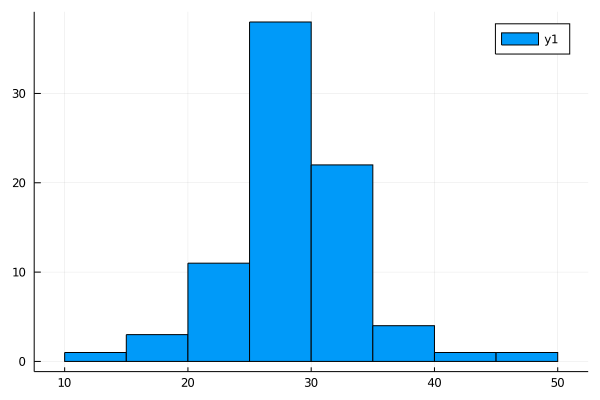

In [8]:
using Plots

# plot(df[:,:age])
# histogram(df[:,[:gender,:age]])
histogram(df[:,:age])

In [111]:
df[df.person_id .=="c676f564-9867-434e-8c12-5516a342de78", ["person_id", "age"]]

,person_id,age
,String,Int64
1,c676f564-9867-434e-8c12-5516a342de78,44
2,c676f564-9867-434e-8c12-5516a342de78,49
3,c676f564-9867-434e-8c12-5516a342de78,49
4,c676f564-9867-434e-8c12-5516a342de78,46
5,c676f564-9867-434e-8c12-5516a342de78,32
6,c676f564-9867-434e-8c12-5516a342de78,47
7,c676f564-9867-434e-8c12-5516a342de78,46
8,c676f564-9867-434e-8c12-5516a342de78,47
9,c676f564-9867-434e-8c12-5516a342de78,42


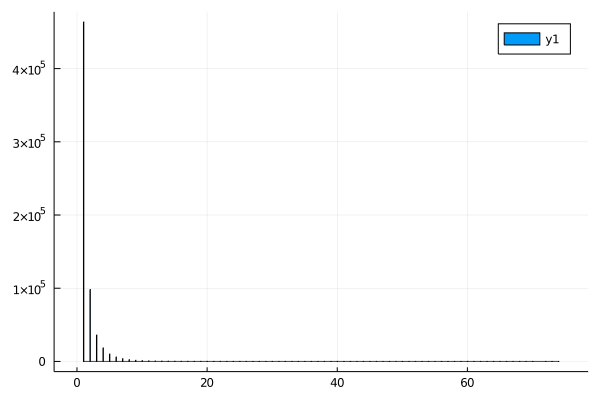

In [108]:
# jdffile = savejdf("obj_info.jdf", df)

aa=combine(DataFrames.groupby(df, :person_id), :age=>mean=>:g_sum, nrow)
bb=sort(aa, :nrow)
histogram(bb[1:end-100, :nrow])